In [1]:
import matplotlib as mpl
import matplotlib.style
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import hist
mpl.style.use('default')
import scipy
from scipy import stats
from scipy.stats import ks_2samp

In [2]:

# UV_ = fits.open('UV_match_WISE_Pipe3d_MangaHI.fits')
# UV = UV_[1].data
# good = np.where(UV["logMHI"] > 9.3)
# DAP=UV[good]

DAP_ = fits.open('DAP_match_IV_Optical_IR.fits')
DAP = DAP_[1].data
good = np.where(DAP["logMHI"] > 9.3) #high in HI 
DAP=DAP[good]

W2 = DAP['W2_mag'] 
W3 = DAP['W3_mag']
x2=W2-W3 #infrared variable


In [3]:
#defining sSFR for each indicator. all HI-rich. nothing about SFR yet

yHa=DAP['log_SFR_Ha']-DAP['log_mass']
# ySF=DAP['log_SFR_SF']-DAP['log_mass']
# yDC=DAP['log_SFR_D_C']-DAP['log_mass']
yssp100=DAP['log_SFR_ssp_100Myr']-DAP['log_mass']
yssp10=DAP['log_SFR_ssp_10Myr']-DAP['log_mass']
yssp32=DAP['log_SFR_ssp']-DAP['log_mass']
yUV=DAP['logSFR']-DAP['log_mass']

In [4]:

x2_fix=x2[np.where(yUV>-50)]
yUV1=yUV[np.where(yUV>-50)]


In [5]:
#finding the new lowsSFR threshold

testyssp10=yssp10[np.where((x2>1.8) & (x2<2.2))]
testyssp32=yssp32[np.where((x2>1.8) & (x2<2.2))]
testyssp100=yssp100[np.where((x2>1.8) & (x2<2.2))]
testyUV=yUV1[np.where((x2_fix>1.8) & (x2_fix<2.2))]

testyHa=yHa[np.where((x2>1.8) & (x2<2.2))] #has nan elements
testyHa=testyHa[np.where(testyHa < 0)] # (!= 'nan') didn't work, so just limiting to less than 0

#taking the mean of each
low10=np.mean(testyssp10)
low32=np.mean(testyssp32)
low100=np.mean(testyssp100)
lowHa=np.mean(testyHa)
lowUV=np.mean(testyUV)
print(low10)
print(low32)
print(low100)
print(lowHa)
print(lowUV)

#making an array of these and finding the mean
list=np.array([low10,low32,low100,lowHa,lowUV])
print ('New sSFR threshold:', np.mean(list))

-10.917531663753197
-11.045897612028467
-11.291756973419217
-11.354040126628552
-11.157649533748172
New sSFR threshold: -11.153375181915521


In [6]:
#reducing to low star-formation, used in histograms

ssp100LowSF = np.where(yssp100<-11.15)
UVLowSF = np.where(yUV<-11.15)
HaLowSF = np.where(yHa<-11.15)
ssp32LowSF = np.where(yssp32<-11.15)
ssp10LowSF = np.where(yssp10<-11.15)

IRLowSF = np.where((x2)<2)

In [7]:
#fix colors for color blindness
cssp10= '#E40B45'
cssp32= '#FD3FF9'
cssp100= '#8E0E0E'

cHa= '#FFC107'
cUV= '#201ACC'
cIR= '#1E88E5'


#individually removing nan from each indicator
#fix the bins?????

UV_clean = yUV1[(~np.isnan(yUV1)) & (~np.isnan(x2_fix))]
ssp10_clean = yssp10[(~np.isnan(yssp10)) & (~np.isnan(x2))]
ssp32_clean = yssp32[(~np.isnan(yssp32)) & (~np.isnan(x2))]
ssp100_clean = yssp100[(~np.isnan(yssp100)) & (~np.isnan(x2))]
Ha_clean = yHa[(~np.isnan(yHa)) & (~np.isnan(x2))]

#matching IR to each indicator to make shapes the same
#also fix bins??
IR_UV_clean = x2_fix[(~np.isnan(yUV1)) & (~np.isnan(x2_fix))]
IR_10_clean = x2[(~np.isnan(yssp10)) & (~np.isnan(x2))]
IR_32_clean = x2[(~np.isnan(yssp32)) & (~np.isnan(x2))]
IR_100_clean = x2[(~np.isnan(yssp100)) & (~np.isnan(x2))]
IR_Ha_clean = x2[(~np.isnan(yHa)) & (~np.isnan(x2))]

In [69]:

UV_bin_means, UV_bin_edges, UV_binnumber = stats.binned_statistic(IR_UV_clean, UV_clean)
s10_bin_means, s10_bin_edges, s10_binnumber = stats.binned_statistic(IR_10_clean, ssp10_clean)
s32_bin_means, s32_bin_edges, s32_binnumber = stats.binned_statistic(IR_32_clean, ssp32_clean)
s100_bin_means, s100_bin_edges, s100_binnumber = stats.binned_statistic(IR_100_clean, ssp100_clean)
Ha_bin_means, Ha_bin_edges, Ha_binnumber = stats.binned_statistic(IR_Ha_clean, Ha_clean)

In [70]:
UV_bin_edges

array([-0.811 , -0.2406,  0.3298,  0.9002,  1.4706,  2.041 ,  2.6114,
        3.1818,  3.7522,  4.3226,  4.893 ])

In [71]:
UV_bin_mid = []
for i in range(len(UV_bin_edges)-1):
    mid=((UV_bin_edges[i]+UV_bin_edges[i+1])/2)
    UV_bin_mid.append(mid)

s10_bin_mid = []
for i in range(len(s10_bin_edges)-1):
    mid=((s10_bin_edges[i]+s10_bin_edges[i+1])/2)
    s10_bin_mid.append(mid)

s32_bin_mid = []
for i in range(len(s32_bin_edges)-1):
    mid=((s32_bin_edges[i]+s32_bin_edges[i+1])/2)
    s32_bin_mid.append(mid)
    
s100_bin_mid = []
for i in range(len(s100_bin_edges)-1):
    mid=((s100_bin_edges[i]+s100_bin_edges[i+1])/2)
    s100_bin_mid.append(mid)
    
Ha_bin_mid = []
for i in range(len(Ha_bin_edges)-1):
    mid=((Ha_bin_edges[i]+Ha_bin_edges[i+1])/2)
    Ha_bin_mid.append(mid)

In [72]:
UV_bin_mid[4]-UV_bin_mid[3]

0.5703999999999998

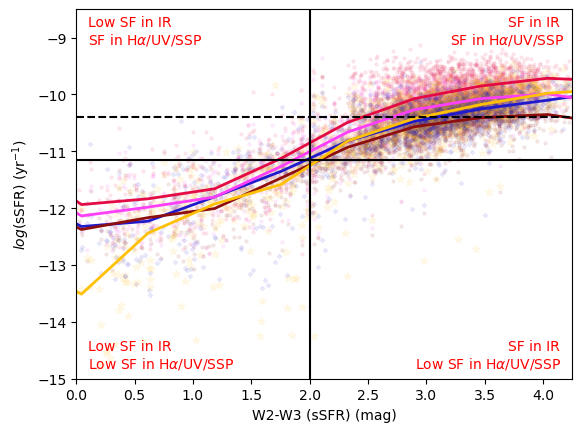

In [93]:
transparency=.07
#plt.scatter (x2, ySF, color = "red", s= 30, label ="SF Only")
#plt.scatter (x2, yDC, color = "maroon", s= 20, label ="Diffuse corrected")


plt.scatter (x2, yssp10, color = cssp10, s=5, alpha=transparency)
plt.scatter (x2, yssp32, color= cssp32, s=5, alpha=transparency)
plt.scatter (x2, yssp100, color= cssp100, s=5, alpha=transparency)
plt.scatter (x2, yHa, color = cHa, marker='*', alpha=transparency)
plt.scatter (x2_fix, yUV1, color= cUV, s=5, marker='D', alpha=transparency)


plt.plot(UV_bin_mid, UV_bin_means, color = cUV, linewidth = 2)
plt.plot(s10_bin_mid, s10_bin_means, color = cssp10, linewidth = 2)
plt.plot(s32_bin_mid, s32_bin_means, color = cssp32, linewidth = 2)
plt.plot(s100_bin_mid, s100_bin_means, color = cssp100, linewidth = 2)
plt.plot(Ha_bin_mid, Ha_bin_means, color = cHa, linewidth = 2)


#plt.legend()
plt.xlabel ('W2-W3 (sSFR) (mag)')
plt.ylabel ('$log$(sSFR) (yr$^{-1}$)')
plt.ylim (-15,-8.5)
plt.xlim(0,4.25)

plt.plot ((2,2),(-17.5,-7.5), color="black")
plt.plot ((-1,5),(-10.4,-10.4),color='black', linestyle='dashed', label="-10.4 yr$^{-1}$")
plt.plot ((-1,5),(-11.15,-11.15),color='black', label='-11.2 yr$^{-1}$')


plt.text(0.1, -8.8, 'Low SF in IR', color='red')
plt.text(0.1, -9.1, r'SF in H$\alpha$/UV/SSP', color='red')

plt.text(3.7, -8.8, 'SF in IR', color='red')
plt.text(3.2, -9.1, r'SF in H$\alpha$/UV/SSP', color='red')

plt.text(0.1, -14.5, 'Low SF in IR', color='red')
plt.text(0.1, -14.8, r'Low SF in H$\alpha$/UV/SSP', color='red')

plt.text(3.7, -14.5, 'SF in IR', color='red')
plt.text(2.9, -14.8, r'Low SF in H$\alpha$/UV/SSP', color='red')


#plt.plot ((UV_bin_edges,UV_bin_edges),(-17.5,-7.5), color="black")



# #top left quadrant
# print('Percentage of each indicator in top left')
# print('Ha ',len(yHa[(x2<2) & (yHa>-11.15)])/len(yHa)*100)
# print('ssp10',len(yssp10[(x2<2) & (yssp10>-11.15)])/len(yssp10)*100)
# print('ssp32 ',len(yssp32[(x2<2) & (yssp32>-11.15)])/len(yssp32)*100)
# print('ssp100 ',len(yssp100[(x2<2) & (yssp100>-11.15)])/len(yssp100)*100)
# print('UV ',len(yUV[(x2_fix<2) & (yUV>-11.15)])/len(yUV)*100)

# #bottom right quadrant
# print('Percentage of each indicator in bottom right')
# print('Ha ',len(yHa[(x2>2) & (yHa<-11.15)])/len(yHa)*100)
# print('ssp10 ',len(yssp10[(x2>2) & (yssp10<-11.15)])/len(yssp10)*100)
# print('ssp32 ',len(yssp32[(x2>2) & (yssp32<-11.15)])/len(yssp32)*100)
# print('ssp100 ',len(yssp100[(x2>2) & (yssp100<-11.15)])/len(yssp100)*100)
# print('UV ',len(yUV[(x2_fix>2) & (yUV<-11.15)])/len(yUV)*100)

plt.savefig('HIrichLowSFFig')

ValueError: x and y must be the same size

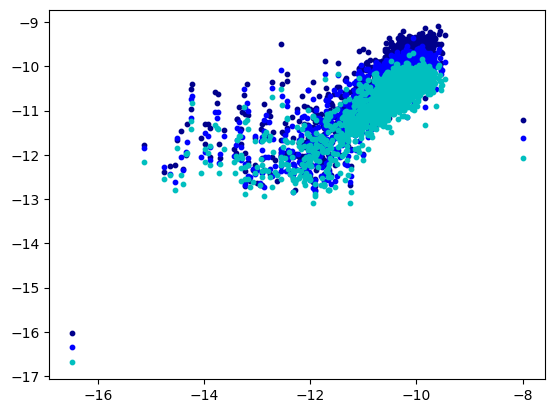

In [207]:
#plt.scatter (yHa, ySF, s=10, color = 'red', label = "SF Only")
#plt.scatter (yHa, yDC, s=10, color = 'maroon', label = "Diffuse correct")
plt.scatter (yHa, yssp10, s=10, color = 'darkblue', label = "SSP 10 Myr")
plt.scatter (yHa, yssp32, s=10, color = 'blue', label = "SSP 32Myr")
plt.scatter (yHa, yssp100, s=10, color = 'c', label = "SSP 100Myr")
plt.scatter (yHa, yUV, s=10, color='purple', label='UV')

plt.title ('UV-derived sSFR to Optical-derived sSFR')
plt.xlabel ('Optical log(sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.ylabel ('UV log(sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.legend ()
plt.plot([-16,-9], [-11.15,-11.15])
plt.plot ([-11.15,-11.15], (-18, -8))
plt.xlim(-15,-9)
plt.ylim(-15,-9)



'''
ignore this
''';
# print('Quadrant 2 (input sSFR star forming but SF not star forming):' 
#           '\n' 'SSP10:', len(yssp10[(yHa<=-11.15)&(yssp10>-11.15)]), "or", (len(yssp10[(yHa<=-11.15)&(yssp10>-11.15)])/len(yssp10))*100,"%"
#           '\n' 'SSP32:', len(yssp32[(yHa<=-11.15)&(yssp32>-11.15)]), "or", (len(yssp32[(yHa<=-11.15)&(yssp32>-11.15)])/len(yssp32))*100,"%"
#           '\n' 'SSP100:', len(yssp100[(yHa<=-11.15)&(yssp100>-11.15)]),"or", (len(yssp100[(yHa<=-11.15)&(yssp100>-11.15)])/len(yssp100))*100,"%"
#          # '\n' 'SF-only:', len(ySF[(yHa<=-10.4)&(ySF>-10.4)]),"or", (len(ySF[(yHa<=-10.4)&(ySF>-10.4)])/len(ySF))*100,"%"
#          # '\n' 'Diffuse corrected:', len(yDC[(yHa<=-10.4)&(yDC>-10.4)]), "or", len(yDC[(yHa<=-10.4)&(yDC>-10.4)])*100,"%"
#      )
# print('\n''The last two (SF-only and DC) are expected because they are all corrections of the original SFR(Ha), so their expected SFRs can only go lower. Essentially, SF-only and DC can never be star forming while SFR(Ha) is not.')


# print ('\n''Quadrant 4 (input sSFR not star forming but SF star forming):'
#           '\n' 'SSP10:', len(yssp10[(yHa>=-11.15)&(yssp10<=-11.15)]), 'or', (len(yssp10[(yHa>=-11.15)&(yssp10<=-10.4)])/len(yssp10))*100,"%"
#           '\n' 'SSP32:', len(yssp32[(yHa>=-11.15)&(yssp32<=-11.15)]), 'or', (len(yssp32[(yHa>=-10.4)&(yssp32<=-10.4)])/len(yssp32))*100,"%"
#           '\n' 'SSP100:', len(yssp100[(yHa>=-11.15)&(yssp100<=-11.15)]), 'or', (len(yssp100[(yHa>=-10.4)&(yssp100<=-10.4)])/len(yssp100))*100,"%"
#          # '\n' 'SF-only:', len(ySF[(x>=-10.4)&(ySF<=-10.4)]), 'or', (len(ySF[(x>=-10.4)&(ySF<=-10.4)])/len(ySF))*100,"%"
#          # '\n' 'Diffuse corrected:', len(yDC[(x>=-10.4)&(yDC<=-10.4)]), 'or', (len(yDC[(x>=-10.4)&(yDC<=-10.4)])/len(yDC))*100,"%"
#       )

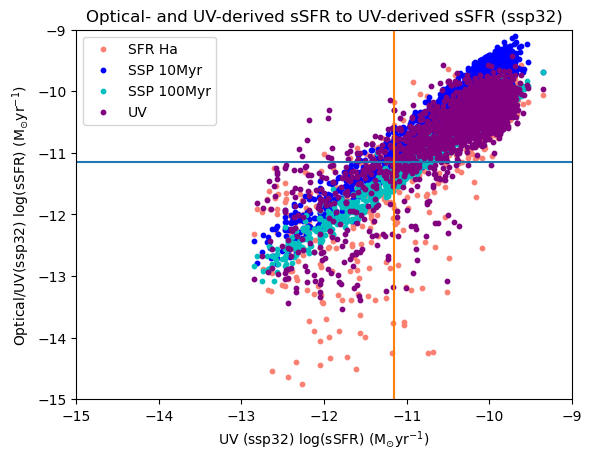

In [20]:
x=yssp32 
plt.scatter (x, yHa, s=10, color = "salmon", label = "SFR Ha")
#plt.scatter (x, ySF, s=10, color = "red", label ="SF Only")
#plt.scatter (x, yDC, s=10, color = "maroon", label ="Diffuse corrected")
plt.scatter (x, yssp10, s=10, color="blue", label= "SSP 10Myr")
plt.scatter (x, yssp100, s=10, color = "c", label ="SSP 100Myr")
plt.scatter (x, yUV, s=10, color='purple', label='UV')

plt.title ('Optical- and UV-derived sSFR to UV-derived sSFR (ssp32)')
plt.legend()
plt.xlabel ('UV (ssp32) log(sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.ylabel ('Optical/UV(ssp32) log(sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.xlim (-15,-9)
plt.ylim (-15,-9)
plt.plot ((-15,-9),(-11.15, -11.15))
plt.plot ((-11.15, -11.15), (-15,-9))

# print('Quadrant 2 (input sSFR star forming but ssp32Myr not star forming):' 
#           '\n' 'SSP10:', len(yssp10[(x<=-10.4)&(yssp10>-10.4)]), "or", (len(yssp10[(x<=-10.4)&(yssp10>-10.4)])/len(yssp10))*100,"%"
#           '\n' 'SSP100:', len(yssp100[(x<=-10.4)&(yssp100>-10.4)]),"or", (len(yssp100[(x<=-10.4)&(yssp100>-10.4)])/len(yssp100))*100,"%"
#          # '\n' 'SF-only:', len(ySF[(x<=-10.4)&(ySF>-10.4)]),"or", (len(ySF[(x<=-10.4)&(ySF>-10.4)])/len(ySF))*100,"%"
#          # '\n' 'Diffuse corrected:', len(yDC[(x<=-10.4)&(yDC>-10.4)]), "or", len(yDC[(x<=-10.4)&(yDC>-10.4)])*100,"%"
#           '\n' 'Ha:', len(yHa[(x<=-10.4)&(yHa>-10.4)]), "or", (len(yHa[(x<=-10.4)&(yHa>-10.4)])/len(yHa))*100, '%'
#      )

# print ('\n' 'Quadrant 4 (input sSFR not star forming but ssp32Myr star forming):'
#           '\n' 'SSP10:', len(yssp10[(x>=-10.4)&(yssp10<-10.4)]), 'or', (len(yssp10[(x>=-10.4)&(yssp10<=-10.4)])/len(yssp10))*100,"%"
#           '\n' 'SSP100:', len(yssp100[(x>=-10.4)&(yssp100<-10.4)]), 'or', (len(yssp100[(x>=-10.4)&(yssp100<=-10.4)])/len(yssp100))*100,"%"
#          # '\n' 'SF-only:', len(ySF[(x>=-10.4)&(ySF<-10.4)]), 'or', (len(ySF[(x>=-10.4)&(ySF<=-10.4)])/len(ySF))*100,"%"
#          # '\n' 'Diffuse corrected:', len(yDC[(x>-10.4)&(yDC<=-10.4)]), 'or', (len(yDC[(x>=-10.4)&(yDC<=-10.4)])/len(yDC))*100,"%"
#           '\n' 'Ha:', len(yHa[(x>=-10.4)&(yHa<-10.4)]), 'or', (len(yHa[(x>=-10.4)&(yHa<=-10.4)])/len(yHa))*100,"%"
#       )

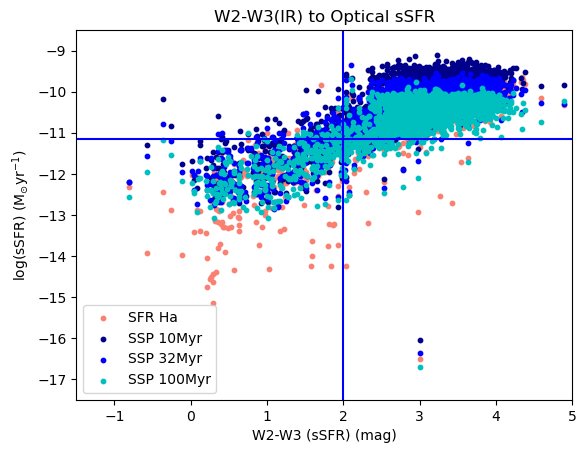

In [9]:

plt.scatter (x2, yHa, color = "salmon", s=10, label = "SFR Ha")
#plt.scatter (x2, ySF, color = "red", s= 30, label ="SF Only")
#plt.scatter (x2, yDC, color = "maroon", s= 20, label ="Diffuse corrected")
plt.scatter (x2, yssp10, color = 'darkblue', s=10, label ="SSP 10Myr")
plt.scatter (x2, yssp32, color= 'blue', s=10, label= "SSP 32Myr")
plt.scatter (x2, yssp100, color= 'c', s=10, label= "SSP 100Myr")

plt.title ('W2-W3(IR) to Optical sSFR')
plt.xlabel ('W2-W3 (sSFR) (mag)')
plt.ylabel ('log(sSFR) (M$_{\odot}$yr$^{-1}$)')
plt.legend()
plt.xlim (-1.5,5)
plt.ylim (-17.5,-8.5)

plt.plot ((2,2),(-20,-8), color = "b")
plt.plot ((-3,5),(-11.15,-11.15), color= "b")

Text(0, 0.5, 'ssp-derived SFR')

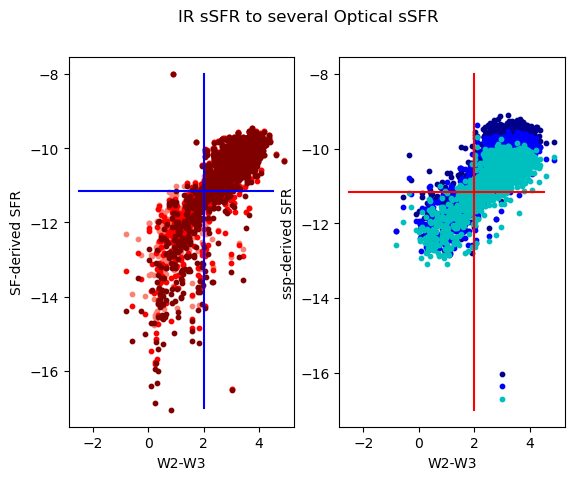

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('IR sSFR to several Optical sSFR')

ax1.scatter(x2, yHa, color='salmon', s=10)
ax1.scatter(x2, ySF, color='red', s=10)
ax1.scatter(x2, yDC, color='maroon', s=10)

ax2.scatter(x2, yssp10, color='darkblue', s=10)
ax2.scatter(x2, yssp32, color='blue', s=10)
ax2.scatter(x2, yssp100, color='c', s=10)


ax1.plot((-2.5,4.5),(-11.15,-11.15), color = "b")
ax1.plot((2,2),(-17,-8), color='b')
ax2.plot((-2.5,4.5),(-11.15,-11.15), color = "r")
ax2.plot((2,2),(-17,-8), color='r')

ax1.set_xlabel ('W2-W3')
ax1.set_ylabel ('SF-derived SFR')
ax2.set_xlabel ('W2-W3')
ax2.set_ylabel ('ssp-derived SFR')

# print('Non star-forming according to W2-W3 (SF in Ha):', len(yHa[(x2<2)&(yHa>-10.4)])) 
# print('Star-forming according to W2-W3(not SF in Ha):', len(yHa[(x2>=2)&(yHa<-10.4)]),
# '\n' 'Only counting Ha because SF and DC are corrections, only need Ha to count this')


# print('\n' 'Non star-forming according to W2-W3(SF in ssp):', len(yssp10[(x2<2)&(yssp10>-10.4)]))
# print('Star-forming according to W2-W3(not SF in ssp):', len(yssp10[(x2>=2)&(yssp10<-10.4)]))

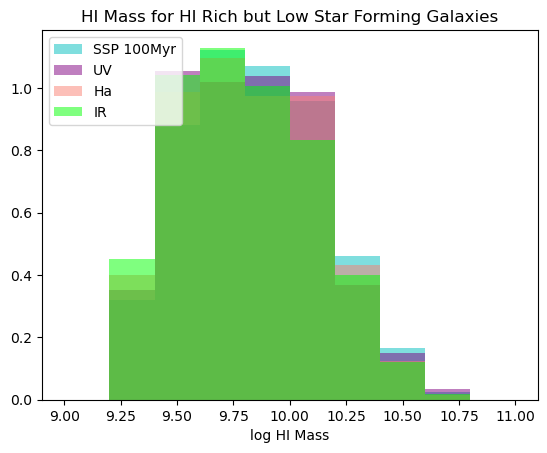

In [66]:
plt.hist (DAP['logMHI'][ssp100LowSF], range=(9,11), bins=10, alpha=0.5, color='c', label='SSP 100Myr', density=True)
plt.hist (DAP['logMHI'][UVLowSF], range=(9,11),bins=10, alpha=0.5, color='purple', label='UV', density=True)
plt.hist (DAP['logMHI'][HaLowSF], range=(9,11),bins=10, alpha=0.5, color='salmon', label='Ha', density=True)
#plt.hist (DAP['logMHI'][np.where(yssp32<-10.4)], range=(8,11),bins=10, alpha=0.7, color='blue', label='SSP 32Myr')
#plt.hist (DAP['logMHI'][np.where(yssp10<-10.4)], range=(8,11),bins=10, alpha=0.7, color='darkblue', label='SSP 10Myr')
plt.hist (DAP['logMHI'][IRLowSF],range=(9,11), bins=10, alpha=0.5, color='lime', label='IR', density=True)

plt.title ('HI Mass for HI Rich but Low Star Forming Galaxies')
plt.xlabel ('log HI Mass')
plt.legend()

KstestResult(statistic=0.033179012345679014, pvalue=0.9937131090365683)
KstestResult(statistic=0.11535493827160494, pvalue=0.05426097256832474)
KstestResult(statistic=0.056967338217338216, pvalue=0.7230506538739035)
KstestResult(statistic=0.026360544217687076, pvalue=0.9996030466231993)
KstestResult(statistic=0.05064655172413793, pvalue=0.7890450616590599)
KstestResult(statistic=0.0, pvalue=1.0)


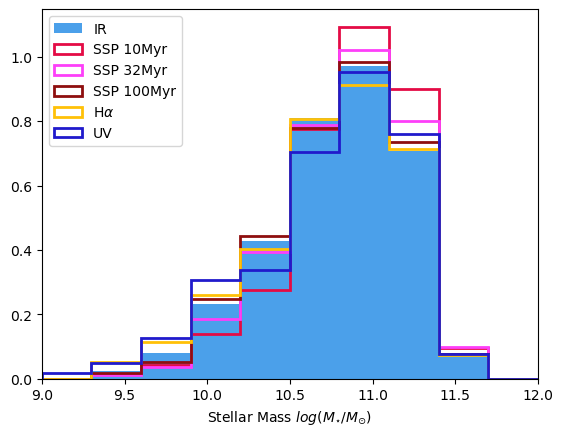

In [95]:
## plotting stellar mass only for low star forming galaxies
plt.hist (DAP['log_mass'][IRLowSF],range=(9,12), bins=10, color=cIR, label='IR', alpha=.8, density=True)
# plt.hist (DAP['log_mass'][IRLowfix],range=(9,12), bins=10, color='pink', label='IR', alpha=.8, density=True)

plt.hist (DAP['log_mass'][ssp10LowSF], range=(9,12),bins=10, color=cssp10, label='SSP 10Myr', density=True,histtype='step',linewidth=2)
plt.hist (DAP['log_mass'][ssp32LowSF], range=(9,12),bins=10, color=cssp32, label='SSP 32Myr', density=True,histtype='step',linewidth=2)
plt.hist (DAP['log_mass'][ssp100LowSF], range=(9,12), bins=10, color=cssp100, label='SSP 100Myr', density=True,histtype='step',linewidth=2)
plt.hist (DAP['log_mass'][HaLowSF], range=(9,12),bins=10, color=cHa, label=r'H$\alpha$', density=True,histtype='step',linewidth=2)
plt.hist (DAP['log_mass'][UVLowSF], range=(9,12),bins=10, color=cUV, label='UV', density=True,histtype='step',linewidth=2)

plt.rcParams["legend.loc"] = 'upper left'

plt.legend()
#plt.title ('Stellar Mass')
plt.xlabel ('Stellar Mass $log(M_{\star}/M_{\odot})$')
plt.xlim(9,12)

IRindicators=[HaLowSF, ssp10LowSF, ssp32LowSF, ssp100LowSF, UVLowSF, IRLowSF]

for i in IRindicators:
    print (stats.kstest(DAP['log_mass'][IRLowSF], DAP['log_mass'][i]))
    
plt.savefig('RNstellarmass')

In [14]:
len(DAP['logMHI'][IRLowSF]-DAP['log_mass'][IRLowSF])

288

KstestResult(statistic=0.04205246913580247, pvalue=0.9377405885882572)
KstestResult(statistic=0.09580761316872428, pvalue=0.16402023585949987)
KstestResult(statistic=0.05589896214896215, pvalue=0.7436522041545326)
KstestResult(statistic=0.03784013605442177, pvalue=0.9618852893147275)
KstestResult(statistic=0.0639367816091954, pvalue=0.5137544769360628)
KstestResult(statistic=0.0, pvalue=1.0)


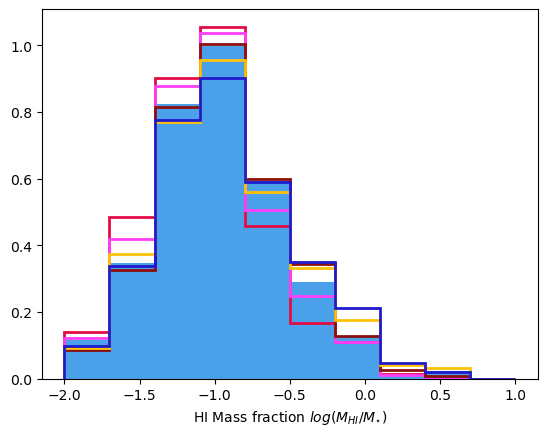

In [96]:
xmin=-2
xmax=1

plt.hist (-DAP['log_mass'][IRLowSF]+DAP['logMHI'][IRLowSF],range=(xmin,xmax), bins=10, alpha=0.8, color=cIR, label='IR', density=True)



plt.hist (-DAP['log_mass'][ssp10LowSF]+DAP['logMHI'][ssp10LowSF], range=(xmin,xmax),bins=10, color=cssp10, label='SSP 10Myr', density=True,histtype='step',linewidth=2)
plt.hist (-DAP['log_mass'][ssp32LowSF]+DAP['logMHI'][ssp32LowSF], range=(xmin,xmax),bins=10, color=cssp32, label='SSP 32Myr', density=True,histtype='step',linewidth=2)
plt.hist (-DAP['log_mass'][ssp100LowSF]+DAP['logMHI'][ssp100LowSF], range=(xmin,xmax), bins=10, color=cssp100, label='SSP 100Myr', density=True,histtype='step',linewidth=2)
plt.hist (-DAP['log_mass'][HaLowSF]+DAP['logMHI'][HaLowSF], range=(xmin,xmax),bins=10, color=cHa, label='Ha', density=True,histtype='step',linewidth=2)
plt.hist (-DAP['log_mass'][UVLowSF]+DAP['logMHI'][UVLowSF], range=(xmin,xmax),bins=10, color=cUV, label='UV', density=True,histtype='step',linewidth=2)

#plt.title ('HI Mass Fraction')
plt.xlabel ('HI Mass fraction $log(M_{HI}/M_{\star})$')
#legend = plt.legend()

HImassfrac=DAP['logMHI']-DAP['log_mass']
for i in IRindicators:
    print(stats.kstest(HImassfrac[IRLowSF],HImassfrac[i]))
    
plt.savefig('RNHIfrac')

Text(0, 0.5, 'Count')

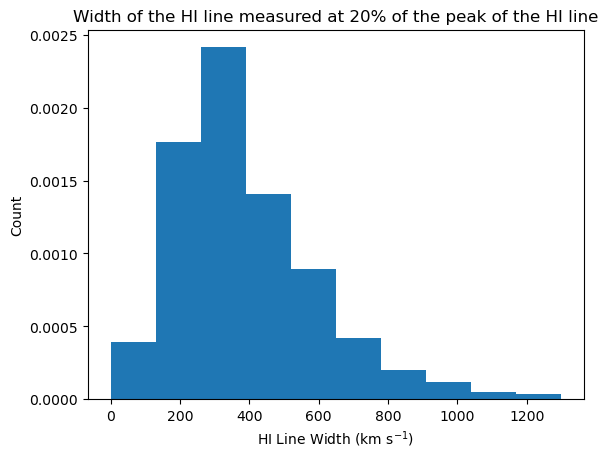

In [28]:
plt.hist (DAP['WP20']/DAP['sini'], range=[0,1300] , bins=10, density=True)
#accounted for inclination

plt.title ('Width of the HI line measured at 20% of the peak of the HI line')
plt.xlabel ('HI Line Width (km s$^{-1}$)')
plt.ylabel ('Count')

Text(0, 0.5, 'Count')

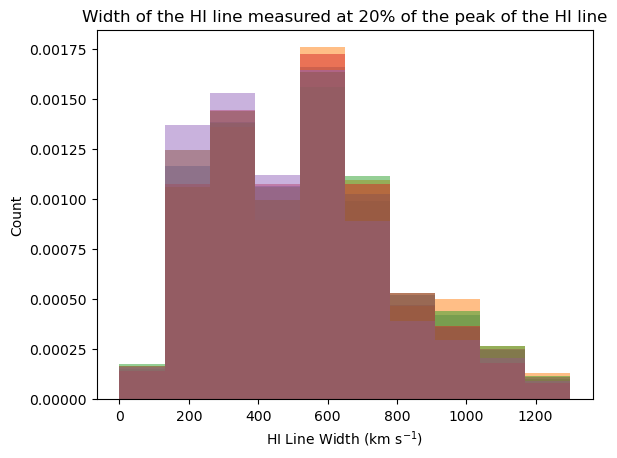

In [29]:
for i in IRindicators:
    plt.hist (DAP['WP20'][i]/DAP['sini'][i], range=[0,1300] , bins=10, density=True, alpha=0.5)

plt.title ('Width of the HI line measured at 20% of the peak of the HI line')
plt.xlabel ('HI Line Width (km s$^{-1}$)')
plt.ylabel ('Count')

For ssp10 : KstestResult(statistic=0.04681069958847737, pvalue=0.9176592292004748)
For ssp32 : KstestResult(statistic=0.019803113553113552, pvalue=0.9999999625071873)
For ssp100 : KstestResult(statistic=0.06242913832199547, pvalue=0.511534768454376)
For Ha : KstestResult(statistic=0.017746913580246913, pvalue=0.999999998444328)
For UV : KstestResult(statistic=0.05866858237547893, pvalue=0.6226287382637301)


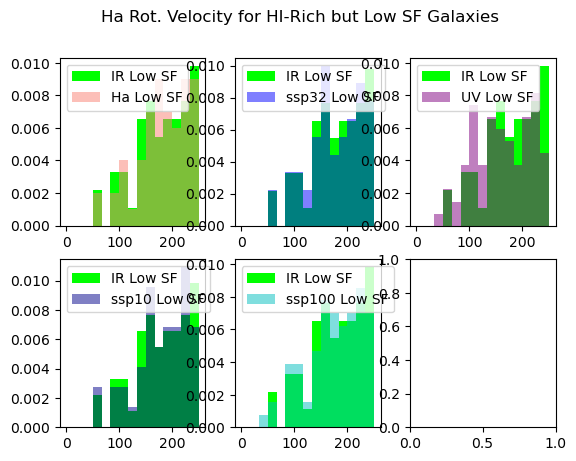

In [32]:
HaRotV=DAP['HA_GVEL_HI_CLIP']-DAP['HA_GVEL_LO_CLIP']
a=0.5
xx=0
yy=250
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Ha Rot. Velocity for HI-Rich but Low SF Galaxies')

def graphHaRotV(x,y,z,c,name):
    axs[x,y].hist(HaRotV[IRLowSF], bins=15, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
    axs[x,y].hist(HaRotV[z], bins=15, alpha=a, range=(xx,yy), color=c, label=(name+' Low SF'), density=True)
    axs[x,y].legend()
    print('For', name, ':' ,stats.kstest(HaRotV[IRLowSF], HaRotV[z]))
    
graphHaRotV(1,0,ssp10LowSF,'darkblue','ssp10')
graphHaRotV(0,1,ssp32LowSF,'blue','ssp32')
graphHaRotV(1,1,ssp100LowSF,'c','ssp100')
graphHaRotV(0,0,HaLowSF,'salmon', 'Ha')
graphHaRotV(0,2,UVLowSF,'purple','UV')

For ssp10 : KstestResult(statistic=0.061342592592592594, pvalue=0.6743098517580467)
For ssp32 : KstestResult(statistic=0.04262057387057387, pvalue=0.9473211641920615)
For ssp100 : KstestResult(statistic=0.11649659863945579, pvalue=0.019937192795535408)
For Ha : KstestResult(statistic=0.05246913580246913, pvalue=0.7716170286129108)
For UV : KstestResult(statistic=0.13852969348659003, pvalue=0.004160667728524525)


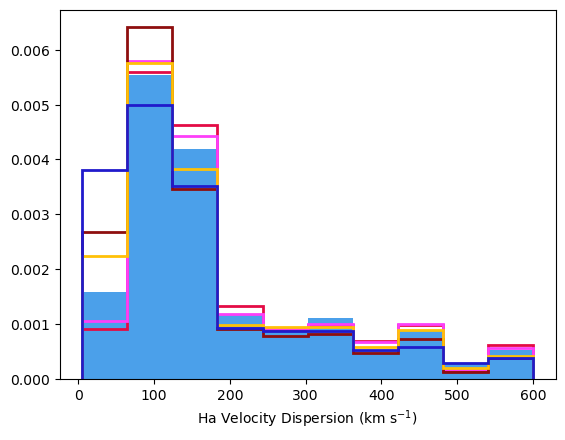

In [97]:
HaVDis=DAP['HA_GSIGMA_1RE']
xx=5
yy=600
#arbitrary xx and yy so i dont accidentally redefine any x or y
plt.hist(HaVDis[IRLowSF], bins=10, color=cIR, alpha=0.8, range=(xx,yy), label=('IR Low SF'), density=True)

def graphHAVDis(z,c,name):
    plt.hist(HaVDis[z], bins=10, range=(xx,yy), color=c, label=(name+' Low SF'), density=True,histtype='step',linewidth=2)
    print('For', name, ':' ,stats.kstest(HaVDis[IRLowSF], HaVDis[z]))
    #plt.legend(loc='upper right')

plt.xlabel('Ha Velocity Dispersion (km s$^{-1}$)')


graphHAVDis(ssp10LowSF,cssp10,'ssp10')
graphHAVDis(ssp32LowSF,cssp32,'ssp32')
graphHAVDis(ssp100LowSF,cssp100,'ssp100')
graphHAVDis(HaLowSF,cHa, 'Ha')
graphHAVDis(UVLowSF,cUV,'UV')

plt.savefig('RNHavdisp')

C:\Users\nora7\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\nora7\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\nora7\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\nora7\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\nora7\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([-2. , -1.7, -1.4, -1.1, -0.8, -0.5, -0.2,  0.1,  0.4,  0.7,  1. ],
       dtype=float32),
 [<matplotlib.patches.Polygon at 0x1b25a9bd820>])

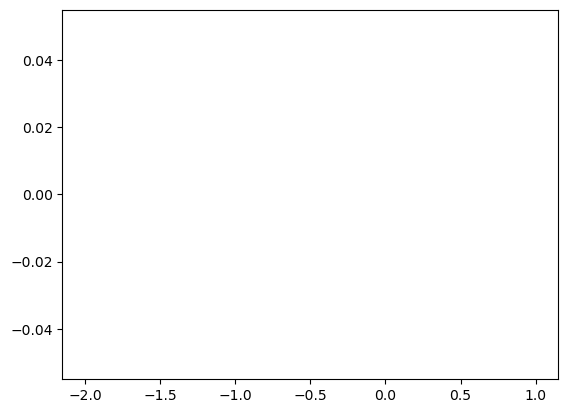

In [21]:
HaVDis=DAP['HA_GSIGMA_1RE']


plt.hist (HaVDis[IRLowSF],range=(xmin,xmax), bins=10, alpha=0.8, color='#377eb8', label='IR', density=True)



plt.hist (HaVDis[ssp10LowSF], range=(xmin,xmax),bins=10, color='#CC050D', label='SSP 10Myr', density=True,histtype='step',linewidth=2)
plt.hist (HaVDis[ssp32LowSF], range=(xmin,xmax),bins=10, color='#FE6100', label='SSP 32Myr', density=True,histtype='step',linewidth=2)
plt.hist (HaVDis[ssp100LowSF], range=(xmin,xmax), bins=10, color='#FFB000', label='SSP 100Myr', density=True,histtype='step',linewidth=2)
plt.hist (HaVDis[HaLowSF], range=(xmin,xmax),bins=10, color='#DC267F', label='Ha', density=True,histtype='step',linewidth=2)
plt.hist (HaVDis[UVLowSF], range=(xmin,xmax),bins=10, color='purple', label='UV', density=True,histtype='step',linewidth=2)


For Ha : KstestResult(statistic=0.017746913580246913, pvalue=0.999999998444328)
For SSP 10 : KstestResult(statistic=0.04681069958847737, pvalue=0.9176592292004748)
For SSP 32 : KstestResult(statistic=0.019803113553113552, pvalue=0.9999999625071873)
For SSP 100 : KstestResult(statistic=0.06242913832199547, pvalue=0.511534768454376)
For UV : KstestResult(statistic=0.05866858237547893, pvalue=0.6226287382637301)


Text(0.5, 0, 'Absolute Ha Velocity Asymmetry (km s$^{-1}$)')

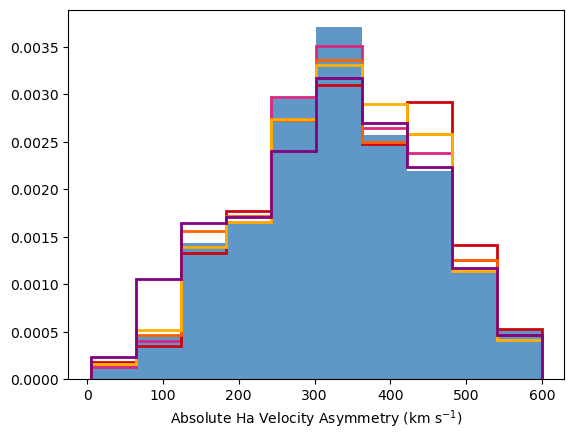

In [37]:
HaVAsym=np.abs(DAP['HA_GVEL_HI_CLIP']-DAP['HA_GVEL_LO_CLIP'])
a=0.5
xx=5
yy=600
#arbitrary xx and yy so i dont accidentally redefine any x or y


plt.hist(HaVAsym[IRLowSF], bins=10, histtype='stepfilled', range=(xx,yy), color='#377eb8', alpha=.8, label=('IR'),density=True)


def graphHaVAsym(z,c,name):
    plt.hist(HaVAsym[z], bins=10, histtype='step', range=(xx,yy), color=c, label=(name),density=True,linewidth=2)
    print('For', name, ':' ,stats.kstest(HaVAsym[IRLowSF], HaVAsym[z]))
graphHaVAsym(HaLowSF,'#DC267F', 'Ha')
graphHaVAsym(ssp10LowSF,'#CC050D','SSP 10')
graphHaVAsym(ssp32LowSF,'#FE6100','SSP 32')
graphHaVAsym(ssp100LowSF,'#FFB000','SSP 100')
graphHaVAsym(UVLowSF,'purple','UV')

plt.xlabel('Absolute Ha Velocity Asymmetry (km s$^{-1}$)')
#plt.legend()

For Ha : KstestResult(statistic=0.022762345679012346, pvalue=0.9999937365164907)
For ssp10 : KstestResult(statistic=0.0470679012345679, pvalue=0.9145383424762814)
For ssp32 : KstestResult(statistic=0.021825396825396824, pvalue=0.9999991573745315)
For ssp100 : KstestResult(statistic=0.06554705215419501, pvalue=0.44956802908312254)
For UV : KstestResult(statistic=0.07183908045977011, pvalue=0.3681572748851649)


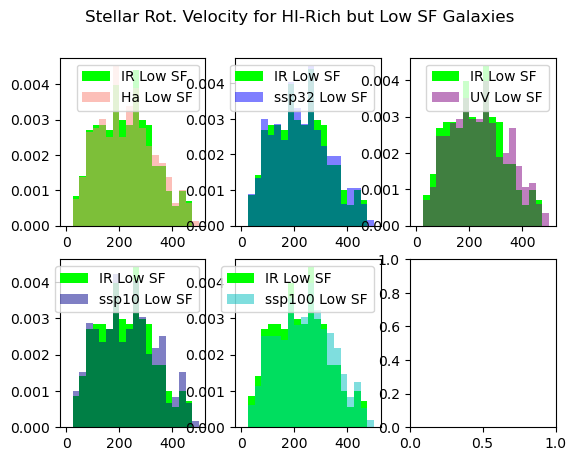

In [33]:
StellarRotV=DAP['STELLAR_VEL_HI_CLIP']-DAP['STELLAR_VEL_LO_CLIP']
a=0.5
xx=0
yy=500
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Stellar Rot. Velocity for HI-Rich but Low SF Galaxies')

def graphStellarRotV(x,y,z,c,name):
    axs[x,y].hist(StellarRotV[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
    axs[x,y].hist(StellarRotV[z], bins=20, alpha=a, range=(xx,yy), color=c, label=(name+' Low SF'), density=True)
    axs[x,y].legend()
    print('For', name, ':' ,stats.kstest(StellarRotV[IRLowSF], StellarRotV[z]))
    
graphStellarRotV(0,0,HaLowSF,'salmon', 'Ha')
graphStellarRotV(1,0,ssp10LowSF,'darkblue','ssp10')
graphStellarRotV(0,1,ssp32LowSF,'blue','ssp32')
graphStellarRotV(1,1,ssp100LowSF,'c','ssp100')
graphStellarRotV(0,2,UVLowSF,'purple','UV')

For Ha : KstestResult(statistic=0.048996913580246916, pvalue=0.8366226100510121)
For ssp10 : KstestResult(statistic=0.11522633744855967, pvalue=0.05469425664905969)
For ssp32 : KstestResult(statistic=0.06196581196581197, pvalue=0.623612138528321)
For ssp100 : KstestResult(statistic=0.06207482993197279, pvalue=0.5188402744750584)
For UV : KstestResult(statistic=0.08477011494252873, pvalue=0.19334044838854936)


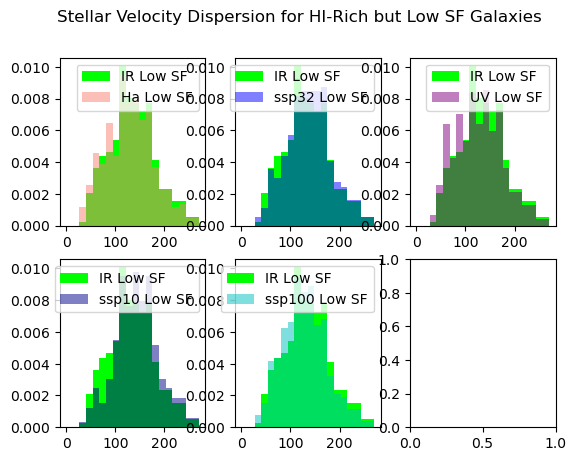

In [34]:
StellarVDis=DAP['STELLAR_SIGMA_1RE']
a=0.5
xx=0
yy=270
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Stellar Velocity Dispersion for HI-Rich but Low SF Galaxies')


def graphStellarVDis(x,y,z,c,name):
    axs[x,y].hist(StellarVDis[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
    axs[x,y].hist(StellarVDis[z], bins=20, alpha=a, range=(xx,yy), color=c, label=(name+' Low SF'), density=True)
    axs[x,y].legend()
    print('For', name, ':' ,stats.kstest(StellarVDis[IRLowSF], StellarVDis[z]))
    
graphStellarVDis(0,0,HaLowSF,'salmon', 'Ha')
graphStellarVDis(1,0,ssp10LowSF,'darkblue','ssp10')
graphStellarVDis(0,1,ssp32LowSF,'blue','ssp32')
graphStellarVDis(1,1,ssp100LowSF,'c','ssp100')
graphStellarVDis(0,2,UVLowSF,'purple','UV')

For Ha : KstestResult(statistic=0.04243827160493827, pvalue=0.9334101551940459)
For ssp10 : KstestResult(statistic=0.03523662551440329, pvalue=0.9941864820065722)
For ssp32 : KstestResult(statistic=0.03021978021978022, pvalue=0.9989251569656453)
For ssp100 : KstestResult(statistic=0.06257086167800453, pvalue=0.5086555584182462)
For UV : KstestResult(statistic=0.07734674329501916, pvalue=0.28380478861295577)


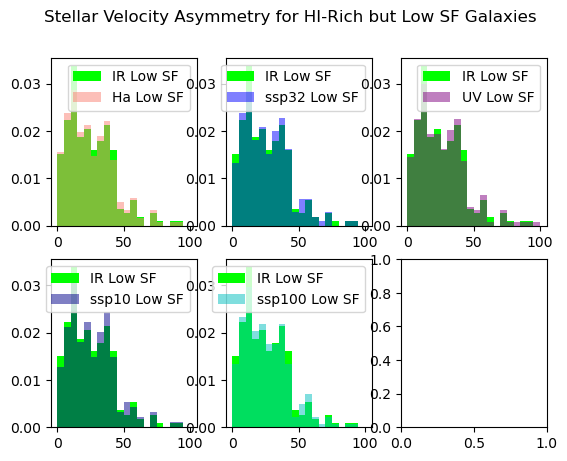

In [35]:
StellarVAsym=np.abs(DAP['STELLAR_VEL_HI_CLIP'])-np.abs(DAP['STELLAR_VEL_LO_CLIP'])
a=0.5
xx=0
yy=100
#arbitrary xx and yy so i dont accidentally redefine any x or y

fig, axs = plt.subplots(2, 3)
fig.suptitle('Stellar Velocity Asymmetry for HI-Rich but Low SF Galaxies')

def graphStellarVAsym(x,y,z,c,name):
    axs[x,y].hist(StellarVAsym[IRLowSF], bins=20, color='lime', range=(xx,yy), label=('IR Low SF'), density=True)
    axs[x,y].hist(StellarVAsym[z], bins=20, alpha=a, range=(xx,yy), color=c, label=(name+' Low SF'), density=True)
    axs[x,y].legend()
    print('For', name, ':' ,stats.kstest(StellarVAsym[IRLowSF], StellarVAsym[z]))
    
graphStellarVAsym(0,0,HaLowSF,'salmon', 'Ha')
graphStellarVAsym(1,0,ssp10LowSF,'darkblue','ssp10')
graphStellarVAsym(0,1,ssp32LowSF,'blue','ssp32')
graphStellarVAsym(1,1,ssp100LowSF,'c','ssp100')
graphStellarVAsym(0,2,UVLowSF,'purple','UV')